<a href="https://colab.research.google.com/github/kaylaniBatin/DI-Bootcamp/blob/main/Week5day1XPexercise_redo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1


Loan Default Prediction: Problem Definition and Data Collection Plan Problem Statement The objective of this project is to develop a predictive model that can accurately identify the likelihood of a loan applicant defaulting on a loan. Early prediction of loan defaults can help financial institutions minimize risk, reduce financial losses, and improve credit decision processes. The model should use relevant borrower information (demographic, financial, and behavioral) and loan-related data to forecast the probability of default.

A loan default occurs when a borrower fails to make the required payments on a loan within the stipulated time frame. Detecting potential defaulters in advance allows lenders to take preventive measures such as revising credit limits, adjusting interest rates, or declining risky applications.

Data Requirements To build an effective loan default prediction model, the following types of data are required:

Personal Details of Applicants Applicant ID (unique identifier)
Age

Gender

Marital status

Education level

Employment status

Number of dependents

Residential status (owned/rented/mortgaged)

Length of stay at current residence

Financial Details Monthly/Annual income
Total debt

Debt-to-Income ratio

Number of open credit lines

Credit utilization rate

Other loan obligations

Credit History and Behavior Credit score (e.g., FICO score)
Length of credit history

Number of past delinquencies

History of late payments (with frequency and severity)

Loan repayment history (on-time, missed payments)

Number of bankruptcies or public records

Number of credit inquiries

Loan Details Loan ID
Loan type (personal, home, auto, etc.)

Loan amount

Loan term (in months/years)

Interest rate

Loan purpose (e.g., education, car, home renovation)

Collateral details (if any)

Installment amount

Loan origination date

Loan status (paid, current, defaulted)

Macroeconomic and External Data (Optional but Valuable) Unemployment rate in applicant's region
Inflation rate

Economic indicators (GDP growth, market trends)

Data Sources

Internal Sources (Financial Institutions) Loan Application Records: Contains borrower personal, financial, and loan-specific data collected during loan processing.
Repayment Databases: Historical data on repayment behavior, including defaults and on-time payments.

Transaction Records: Internal banking transactions may indicate financial health.

External Sources Credit Bureaus (e.g., Experian, Equifax, TransUnion): Provides detailed credit scores, credit history, and inquiries.
Public Records: Bankruptcy filings, court judgments, and tax liens.

Government Statistical Data: Regional economic indicators like unemployment and inflation rates.

Open Datasets (for practice or model prototyping) LendingClub / Prosper Dataset: Publicly available datasets containing anonymized loan and repayment information.
Kaggle Datasets: Datasets such as the "Give Me Some Credit" dataset can be useful for model training and experimentation.

World Bank or National Statistics: For macroeconomic indicators.

Summary Data Type Examples Source Personal Details Age, Gender, Marital Status, Education Loan Applications, Customer Records Financial Details Income, Debt, Credit Utilization Internal Bank Data, Credit Bureaus Credit History Credit Score, Delinquencies, Bankruptcies Credit Bureaus (Experian, Equifax, TransUnion) Loan Details Loan Amount, Term, Interest Rate, Status Internal Loan Databases Macroeconomic Indicators Unemployment Rate, GDP Growth Government Reports, World Bank, National Statistics

Conclusion A well-rounded dataset combining personal, financial, credit, and loan details, along with macroeconomic factors, will provide the necessary foundation for developing an accurate loan default prediction model. These data types, sourced from both internal and reputable external providers, ensure the model can capture both borrower-specific and broader economic influences on loan repayment behavior.

exercise 2

In [ ]:
import pandas as pd

# Load dataset from the correct path
data_path = '/content/loan_data/train.csv'
df = pd.read_csv(data_path)

# Quick check
print("Shape:", df.shape)
df.info()
df.head()


Shape: (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


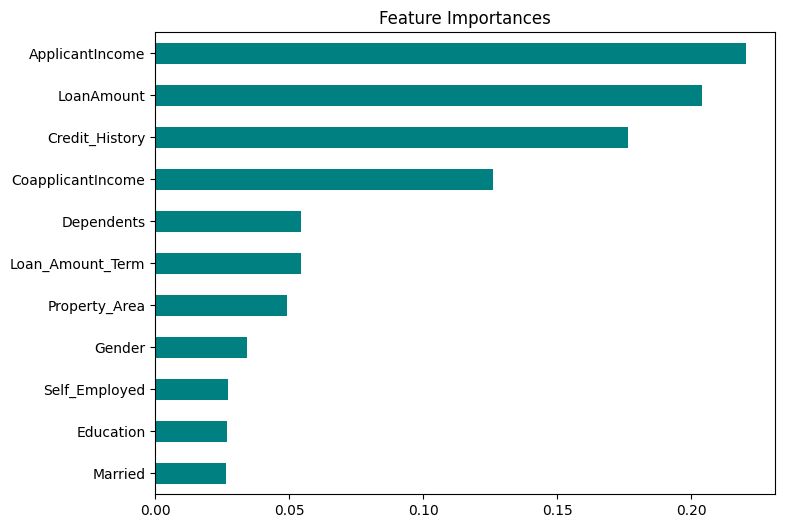

Top Features:
 ApplicantIncome      0.220443
LoanAmount           0.204017
Credit_History       0.176490
CoapplicantIncome    0.126264
Dependents           0.054463
dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Drop Loan_ID as it's not useful
df = df.drop('Loan_ID', axis=1)

# Convert target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Handle categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    df[col] = df[col].fillna('Missing')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Handle numerical missing values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(0)

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Random Forest to get feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6), color='teal')
plt.title('Feature Importances')
plt.show()

print("Top Features:\n", importances.sort_values(ascending=False).head())


exercise 3

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7723577235772358
Confusion Matrix:
 [[22 21]
 [ 7 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.51      0.61        43
           1       0.78      0.91      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.77      0.77      0.76       123

ROC-AUC Score: 0.7488372093023256


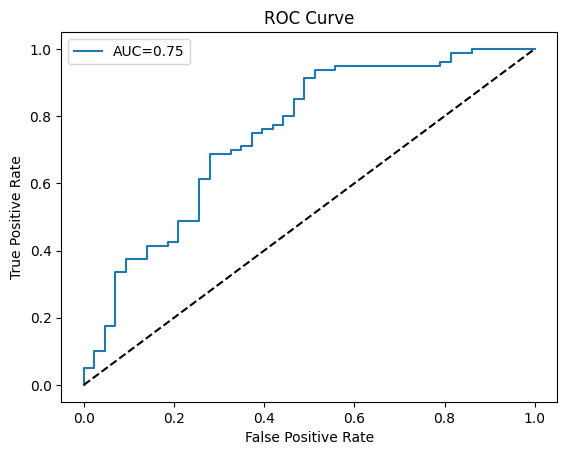

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


exercise 4

| Problem                      | ML Type                   | Why?                                                                           |
| ---------------------------- | ------------------------- | ------------------------------------------------------------------------------ |
| **Stock Price Prediction**   | Supervised (Regression)   | Predict continuous numerical values (stock price) based on past data.          |
| **Organizing Library Books** | Unsupervised (Clustering) | Group unlabelled books by similarity in content or metadata.                   |
| **Robot Maze Navigation**    | Reinforcement Learning    | Robot learns an optimal path through rewards and penalties in the environment. |


exercise 5

| Model Type        | Example Model                        | Evaluation Strategy                                                                      | Challenges                                              |
| ----------------- | ------------------------------------ | ---------------------------------------------------------------------------------------- | ------------------------------------------------------- |
| **Supervised**    | Logistic Regression (classification) | Accuracy, Precision, Recall, F1-Score, ROC-AUC; validated with k-Fold CV and ROC Curves. | Imbalanced data, overfitting risk, threshold selection. |
| **Unsupervised**  | KMeans (clustering)                  | Silhouette Score, Elbow Method, Davies-Bouldin Index.                                    | Hard to validate as no ground truth labels.             |
| **Reinforcement** | Q-Learning (robot navigation)        | Total Cumulative Reward, Learning Convergence speed.                                     | Complex environment simulation, reward shaping issues.  |
